In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_excel('SNA.xlsx', sheet_name="SNA")

print(df.head())

   s_a           x  s_b      y  phase
0    7  Dinas PUPR    1   BPBD      1
1    1        BPBD    2  Polri      1
2    7  Dinas PUPR    9   BWSS      1
3    1        BPBD    2  Polri      2
4    1        BPBD    3    TNI      2


In [7]:
color_map = plt.cm.viridis

In [8]:
legend_handles = []

In [10]:
unique_phases = df['phase'].unique()

Performing analysis for Phase 1


NetworkXError: random_state_index is incorrect

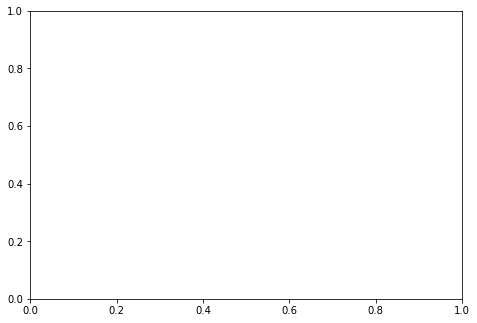

In [17]:
for phase in df['phase'].unique():
    subgraph = df[df['phase'] == phase]
    G = nx.from_pandas_edgelist(subgraph, source='s_a', target='s_b')

    if phase == 1:
        print("Performing analysis for Phase 1")
        # Example: Draw the graph
        nx.draw(G, with_labels=True)
        plt.title("Graph for Phase 1")
        plt.show()

    elif phase == 2:
        print("Performing analysis for Phase 2")
        # Example: Draw the graph
        nx.draw(G, with_labels=True)
        plt.title("Graph for Phase 2")
        plt.show()

    elif phase == 3:
        print("Performing analysis for Phase 3")
        # Example: Draw the graph
        nx.draw(G, with_labels=True)
        plt.title("Graph for Phase 3")
        plt.show()

    else:
        print("No specific action defined for Phase", phase)

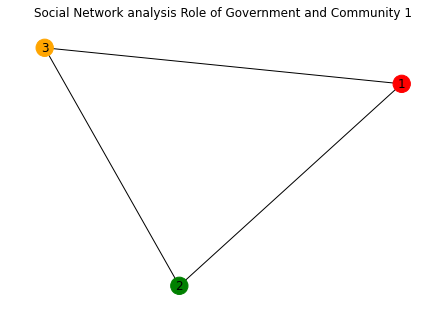

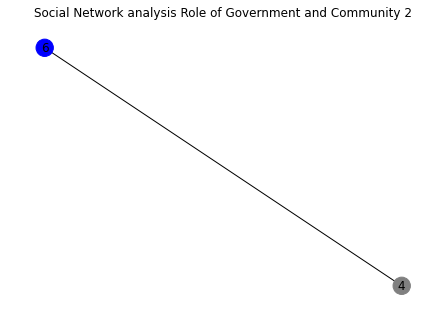

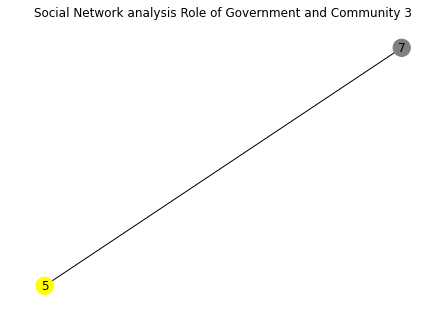

In [ ]:
for phase in df['phase'].unique():
    subgraph = df[df['phase'] == phase]
    G = nx.from_pandas_edgelist(subgraph, source='s_a', target='s_b')

    agency_colors = {
        'Regional Disaster Management': 'orange',
        'Social Departement': 'green',
        'Public Works Departement': 'red',
        'Planning Agencey': 'blue',
        'Private Sector': 'yellow',
        'Local Community': 'gray'
    
    }

    node_colors = [agency_colors.get(agency, 'gray') for agency in set(subgraph['source']).union(subgraph['target'])]

    nx.draw(G, with_labels=True, node_color=node_colors)
    plt.title(f"Social Network analysis Role of Government and Community {phase}")
    
        # Save the plot as a PNG file
    plt.savefig(f"social_network_phase_{phase}.png")
    
    plt.show()

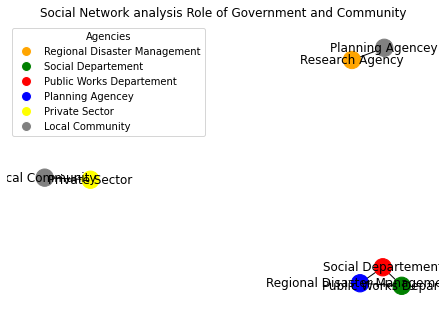

In [ ]:
# Combine all data from different phases into a single DataFrame
combined_df = pd.concat([df[df['phase'] == phase] for phase in df['phase'].unique()])

# Create a graph from the combined DataFrame
G = nx.from_pandas_edgelist(combined_df, source='source', target='target')

# Create a list of all unique agencies
all_agencies = set(combined_df['source']).union(combined_df['target'])

# Assign colors to each agency
colors = {
    'Regional Disaster Management': 'orange',
    'Social Departement': 'green',
    'Public Works Departement': 'red',
    'Planning Agencey': 'blue',
    'Private Sector': 'yellow',
    'Local Community': 'gray'
}

# Assign a color to each node based on its agency
node_colors = [colors.get(agency, 'gray') for agency in all_agencies]

# Draw the graph
nx.draw(G, with_labels=True, node_color=node_colors)

# Add legend
patches = [plt.Line2D([0], [0], marker='o', color='w', label=agency, 
                      markerfacecolor=color, markersize=10) for agency, color in colors.items()]
plt.legend(handles=patches, title='Agencies', loc='best')

plt.title("Social Network analysis Role of Government and Community")
plt.show()

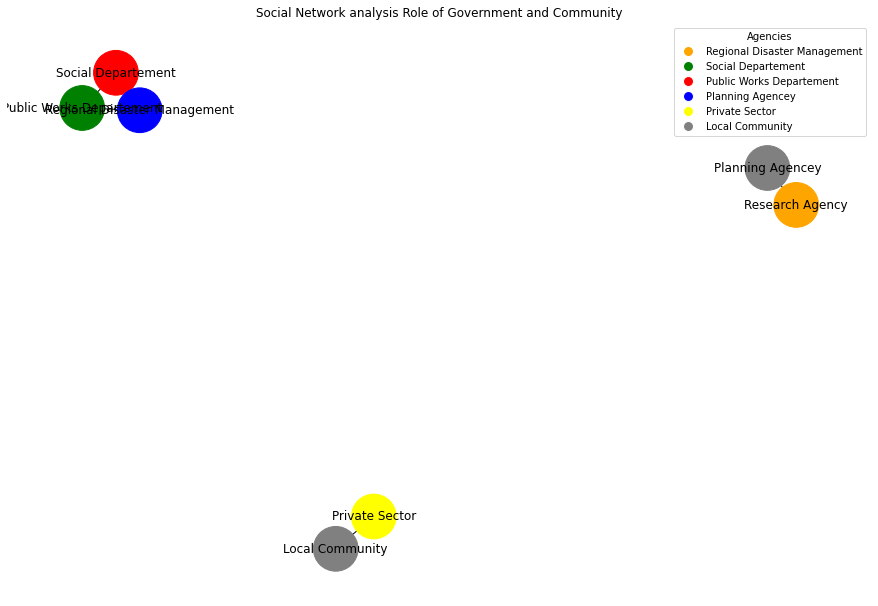

In [ ]:
# Assuming you already have the combined_df, G, all_agencies, colors, and node_colors defined

# Set the figure size
plt.figure(figsize=(12, 8))

# Draw the graph with increased node size
nx.draw(G, with_labels=True, node_color=node_colors, node_size=2000)  # Adjust the node_size as needed

# Add legend
patches = [plt.Line2D([0], [0], marker='o', color='w', label=agency, 
                      markerfacecolor=color, markersize=10) for agency, color in colors.items()]
plt.legend(handles=patches, title='Agencies', loc='best')

plt.title("Social Network analysis Role of Government and Community")
plt.show()